# YOLO

In [124]:
from ultralytics import YOLO
import cv2 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
from random import randrange
import os

In [125]:
# load a pretrained model (recommended for training)
model = YOLO("yolov8m.pt")

In [126]:
# Load an image
#img = ('test1.jpeg')
img = ('img_0116.jpg')

# Run batched inference on a image
results = model(img)


image 1/1 D:\projet ia\Documentation\img_0116.jpg: 640x448 3 persons, 6 cars, 1 truck, 1 handbag, 1 tie, 1 cell phone, 437.0ms
Speed: 3.5ms preprocess, 437.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


In [127]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  2., 26.,  2.,  2.,  2.,  0., 27., 67.,  2.,  7.,  2.,  0.])
conf: tensor([0.9349, 0.9098, 0.8774, 0.8542, 0.7414, 0.6278, 0.5238, 0.4470, 0.4337, 0.3430, 0.3167, 0.3104, 0.3085])
data: tensor([[1.2410e+02, 1.7551e+01, 3.5911e+02, 8.2005e+02, 9.3492e-01, 0.0000e+00],
        [1.4229e+01, 2.6266e+02, 1.2657e+02, 3.6334e+02, 9.0980e-01, 2.0000e+00],
        [3.0084e+02, 3.4449e+02, 3.8121e+02, 5.3993e+02, 8.7743e-01, 2.6000e+01],
        [3.3136e+02, 2.6208e+02, 5.3826e+02, 4.3522e+02, 8.5418e-01, 2.0000e+00],
        [4.6364e+02, 2.6640e+02, 5.4811e+02, 4.7011e+02, 7.4137e-01, 2.0000e+00],
        [3.2914e+02, 2.4882e+02, 4.2780e+02, 3.0492e+02, 6.2783e-01, 2.0000e+00],
        [4.1890e+02, 2.3481e+02, 4.6673e+02, 2.7321e+02, 5.2376e-01, 0.0000e+00],
        [2.3834e+02, 1.6888e+02, 2.7607e+02, 2.6525e+02, 4.4699e-01, 2.7000e+01],
        [3.2805e+02, 2.6492e+02, 3.5375e+02, 2.9015e+02, 4.3371e-01, 6.7000e+01],


In [128]:
# Get the height and width of the image
data = []# y, x
save = cv2.imread(img)
(h, w) = save.shape[:2]
data.append([round(h/2), round(w/2)])
print(data)

[[412, 275]]


# First try: problem with center and margin

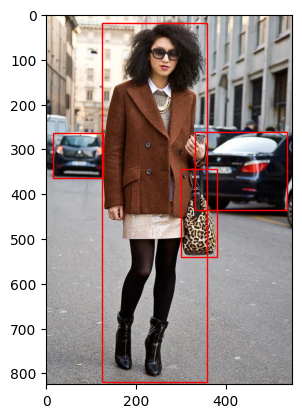

List of all red box centers: [[242, 419], [70, 313], [341, 442], [435, 349]]


In [129]:
# Load image
im = Image.open(img)
fig, ax = plt.subplots()
ax.imshow(im)

# Initialization of centre list
centre = []

# For all result detected by YOLO 
for result in results:
    for i, boxe in enumerate(result.boxes.conf):
        # If YOLO is 85% sure of the object class
        if boxe.numpy() > 0.85:
            xyxy = result.boxes.xyxy.numpy()

            # Generates rectangles around objects
            rect = patches.Rectangle((xyxy[i][0], xyxy[i][1]), (xyxy[i][2]-xyxy[i][0]), (xyxy[i][3]-xyxy[i][1]), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            # Get the center of the box
            centre.append([round((xyxy[i][2]+xyxy[i][0])/2), round((xyxy[i][3]+xyxy[i][1])/2)])

plt.show()
print('List of all red box centers: ' +str(centre))

In [130]:
# Length and width of cropped image 
square = 150

# Crop image around red box center
for i, cen in enumerate(centre) :
    box = (cen[0]-square, cen[1]-square, cen[0]+square, cen[1]+square)
    img2 = im.crop(box)
    img2.save('crop/myimage_cropped'+str(i)+'.jpg')
    

# Second try: problem with margin fixed (problem with center still here)

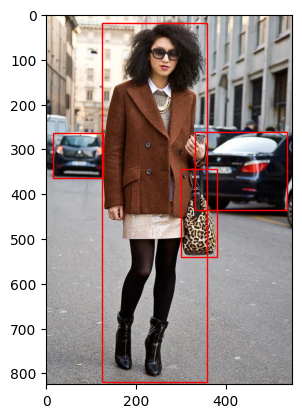

List of all red box centers: [[242, 419], [70, 313], [341, 442], [435, 349]]


In [133]:
# Load image
im = Image.open(img)
fig, ax = plt.subplots()
ax.imshow(im)

# Initialization of centre list
centre = []

# For all result detected by YOLO 
for result in results:
    for i, boxe in enumerate(result.boxes.conf):
        # If YOLO is 85% sure of the object class
        if boxe.numpy() > 0.85:
            xyxy = result.boxes.xyxy.numpy()

            # Generates rectangles around objects
            rect = patches.Rectangle((xyxy[i][0], xyxy[i][1]), (xyxy[i][2]-xyxy[i][0]), (xyxy[i][3]-xyxy[i][1]), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            # Get the center of the box
            centre.append([round((xyxy[i][2]+xyxy[i][0])/2), round((xyxy[i][3]+xyxy[i][1])/2)])

plt.show()
print('List of all red box centers: ' +str(centre))

In [132]:
# Length and width of cropped image 
square = 150

for i, cen in enumerate(centre) :
    if (cen[0]-square) < 0:
        cen[0] = cen[0] + -1*(cen[0]-square)
    if (cen[0]+square) > w:
        cen[0] = cen[0] - -1*(w-(cen[0]+square))
    if cen[1]+2*square > h:
        cen[1] = cen[1] + -1*(h-(cen[1]+2*square))
    box = (cen[0]-square, cen[1], cen[0]+square, cen[1]+2*square)
    cropImage = im.crop(box)
    cropImage.save('crop/myimage_cropped'+str(i)+'.jpg')

# Third try: problem with margin and center fixed

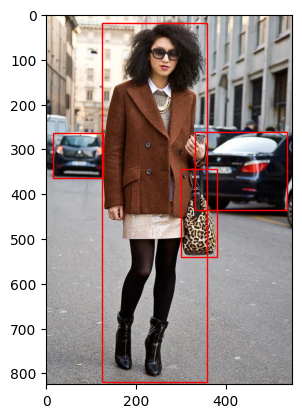

List of all red box centers: [[242, 18], [70, 263], [341, 344], [435, 262]]


In [135]:
# Load image
im = Image.open(img)
fig, ax = plt.subplots()
ax.imshow(im)

# Initialization of centre list
centre = []

# For all result detected by YOLO 
for result in results:
    for i, boxe in enumerate(result.boxes.conf):
        # If YOLO is 85% sure of the object class
        if boxe.numpy() > 0.85:
            xyxy = result.boxes.xyxy.numpy()

            # Generates rectangles around objects
            rect = patches.Rectangle((xyxy[i][0], xyxy[i][1]), (xyxy[i][2]-xyxy[i][0]), (xyxy[i][3]-xyxy[i][1]), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            # Get the center of the box
            centre.append([round((test[i][2]+test[i][0])/2), round(test[i][1])])

plt.show()
print('List of all red box centers: ' +str(centre))

In [136]:
# Length and width of cropped image 
square = 150

for i, cen in enumerate(centre) :
    if (cen[0]-square) < 0:
        cen[0] = cen[0] + -1*(cen[0]-square)
    if (cen[0]+square) > w:
        cen[0] = cen[0] - -1*(w-(cen[0]+square))
    if cen[1]+2*square > h:
        cen[1] = cen[1] + -1*(h-(cen[1]+2*square))
    box = (cen[0]-square, cen[1], cen[0]+square, cen[1]+2*square)
    cropImage = im.crop(box)
    cropImage.save('crop/myimage_cropped'+str(i)+'.jpg')